In [1]:
from moviepy.editor import VideoFileClip
from svm_pipeline import *
from yolo_pipeline import *
from lane import *

loading existing classifier...
Building YOLO_small graph...
Layer  1 : Type = Conv, Size = 7 * 7, Stride = 2, Filters = 64, Input channels = 3
Layer  2 : Type = Pool, Size = 2 * 2, Stride = 2
Layer  3 : Type = Conv, Size = 3 * 3, Stride = 1, Filters = 192, Input channels = 64
Layer  4 : Type = Pool, Size = 2 * 2, Stride = 2
Layer  5 : Type = Conv, Size = 1 * 1, Stride = 1, Filters = 128, Input channels = 192
Layer  6 : Type = Conv, Size = 3 * 3, Stride = 1, Filters = 256, Input channels = 128
Layer  7 : Type = Conv, Size = 1 * 1, Stride = 1, Filters = 256, Input channels = 256
Layer  8 : Type = Conv, Size = 3 * 3, Stride = 1, Filters = 512, Input channels = 256
Layer  9 : Type = Pool, Size = 2 * 2, Stride = 2
Layer  10 : Type = Conv, Size = 1 * 1, Stride = 1, Filters = 256, Input channels = 512
Layer  11 : Type = Conv, Size = 3 * 3, Stride = 1, Filters = 512, Input channels = 256
Layer  12 : Type = Conv, Size = 1 * 1, Stride = 1, Filters = 256, Input channels = 512
Layer  13 : Type = C

In [2]:
def pipeline_yolo(img):

    img_undist, img_lane_augmented, lane_info = lane_process(img)
    output = vehicle_detection_yolo(img_undist, img_lane_augmented, lane_info)

    return output

In [3]:
def pipeline_svm(img):

    img_undist, img_lane_augmented, lane_info = lane_process(img)
    output = vehicle_detection_svm(img_undist, img_lane_augmented, lane_info)

    return output

(720, 1280, 3)


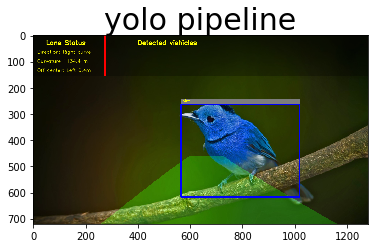

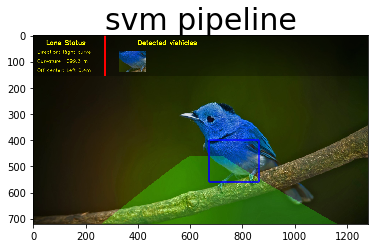

In [26]:
filename = 'examples/tle.jpg'
image = mpimg.imread(filename)
image=cv2.resize(image,(1280,720))
print(image.shape)
#(1) Yolo pipeline
yolo_result = pipeline_yolo(image)
plt.figure()
plt.imshow(yolo_result)
plt.title('yolo pipeline', fontsize=30)
cv2.imwrite('newImage.png',yolo_result)
#(2) SVM pipeline
draw_img = pipeline_svm(image)
fig = plt.figure()
plt.imshow(draw_img)
plt.title('svm pipeline', fontsize=30)
plt.show()

In [ ]:
video_output = 'examples/project_YOLO.mp4'
clip1 = VideoFileClip("examples/CCTV.mp4").subclip(30,35)
clip = clip1.fl_image(pipeline_yolo)
clip.write_videofile(video_output, audio=False)

In [27]:
video_output = 'examples/project_svm.mp4'
clip1 = VideoFileClip("examples/CCTV.mp4").subclip(30,35)
clip = clip1.fl_image(pipeline_svm)
clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video examples/project_svm.mp4
[MoviePy] Writing video examples/project_svm.mp4


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [02:30<00:00,  1.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: examples/project_svm.mp4 

